<a href="https://colab.research.google.com/github/PuiPu/data_sci_final_project/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 匯入 github

In [6]:
# 使用個人訪問令牌克隆私有存儲庫
!git clone https://github.com/PuiPu/data_sci_final_project.git

fatal: destination path 'data_sci_final_project' already exists and is not an empty directory.


# ARIMA (Gemini)

In [7]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# 讀取克隆的存儲庫中的 .csv 文件
df = pd.read_csv('/content/data_sci_final_project/aapl_us_d.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('Date', inplace=True)
df = df.fillna(df.mean()) # 填補缺失值

In [8]:
df = df.interpolate(method='linear')  # 线性插值


# # 推斷頻率
# df = df.asfreq('d')
# # 填補缺失值
# df = df.fillna(df.mean())

# # 使用推斷的頻率創建日期索引
# df.index = pd.date_range(start=df.index[0], periods=len(df), freq=freq)

In [9]:
print(df.index.freq)
print(df.isnull().sum())

None
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [10]:
# # 看走勢
# fig, ax = plt.subplots(figsize = (10, 5))
# plt.plot(df['Close'], label = 'close')
# plt.title('apple stock price')
# plt.legend()

# 定態 ?
1. 非定態
  1. 不能夠以此為模型的數據來源(隨機波動沒辦法用模型來解釋)

In [11]:
# 從statsmodels數據包導入ADF套件
from statsmodels.tsa.stattools import adfuller
# 從產出的ADF報表擷取P-value項目
price_p_value = adfuller(df['Close'])[1]
# 設定判別式以及0.05的P-value標準
if price_p_value > 0.05:
    print('Nonstationary')
else:
    print('Stationary')

Nonstationary


In [12]:
# 一阶差分
diff_df = df.diff().dropna()  # 计算一阶差分并去除 NaN

# 從產出的ADF報表擷取P-value項目
price_p_value = adfuller(diff_df['Close'])[1]
# 設定判別式以及0.05的P-value標準
if price_p_value > 0.05:
    print('Nonstationary')
else:
    print('Stationary')


Stationary


In [13]:
from datetime import datetime
# Split the data into training and testing sets
train_end = datetime(2017, 11, 6)
test_start = datetime(2017, 11, 7)
train_data = df[:train_end]
test_data = df[test_start:] # 用原始的 df

In [14]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.2 MB/s eta 0:00:00


In [15]:
# from pmdarima import auto_arima
# model = auto_arima(diff_df['Volume'], seasonal=True, m=12)  # 每年 m=12
# print(model.order)  # 獲取最佳 (p, d, q)

In [16]:
# 建立模型並預測
model = ARIMA(train_data['Close'], order=(2, 1, 6))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
# 設定從某個時間點開始預測，並一直到指定的結束點
dynamic_forecast = model_fit.predict(start=8150, end=10081)  # 2017-01-03~2024-09-06
print(dynamic_forecast)

8150     27.167514
8151     27.287374
8152     27.586655
8153     27.841470
8154     27.867940
           ...    
10077    41.239180
10078    41.239180
10079    41.239180
10080    41.239180
10081    41.239180
Name: predicted_mean, Length: 1932, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# 畫出趨勢線

1718


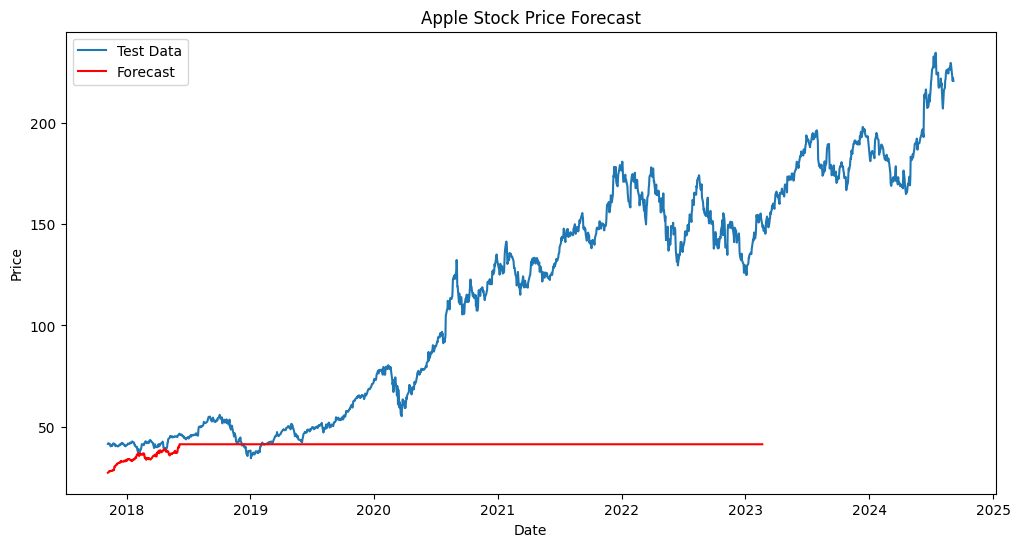

In [18]:
import matplotlib.pyplot as plt

print(len(test_data))

# 繪製圖表
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[test_data.index >= '2017-01-01'], test_data['Close'][test_data.index >= '2017-01-01'], label='Test Data')

forecast_index = pd.date_range(start=test_data.index[0], periods=len(dynamic_forecast), freq='D')
plt.plot(forecast_index, dynamic_forecast, label='Forecast', color='red')

plt.title('Apple Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()